# Benin EDA Notebook (Updated)
This notebook includes:
- **Imports:** pandas, matplotlib, seaborn, and any other required libraries.
- **Timestamp Parsing:** Convert `Timestamp` column to datetime.
- **Time-Series Plot:** Visualize GHI, DNI, DHI, and Tamb over time.


In [1]:
# Necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Parse Timestamp column as datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

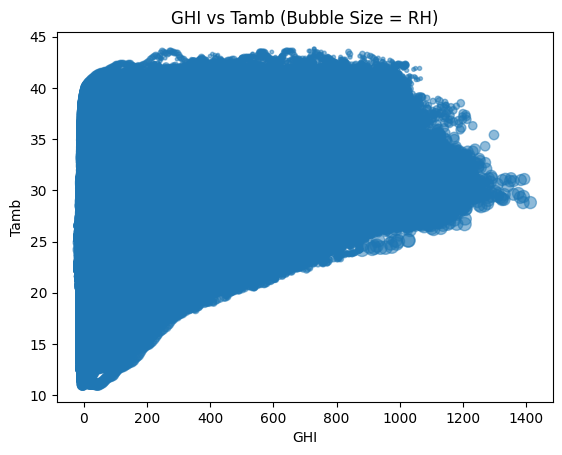

In [31]:
plt.scatter(df['GHI'], df['Tamb'], s=df['RH'], alpha=0.5)
plt.xlabel('GHI'); plt.ylabel('Tamb'); plt.title('GHI vs Tamb (Bubble Size = RH)')
plt.show()


<Axes: >

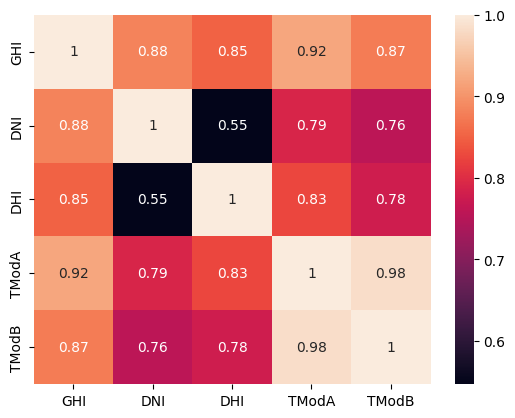

In [35]:
import seaborn as sns

sns.heatmap(df[["GHI", "DNI", "DHI", "TModA", "TModB"]].corr(), annot=True)


In [40]:
print(df.columns)


Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')


In [45]:
# Example: flag outliers using z-score (simple version)
from scipy.stats import zscore

df["z_modA"] = zscore(df["ModA"])
df["outlier"] = (df["z_modA"].abs() > 3)  # Mark as outlier if z > 3


C:\Users\hp\AppData\Local\Temp\ipykernel_16696\776563150.py:7: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\hp\OneDrive\Desktop\solar-challenge-week1\week-0\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


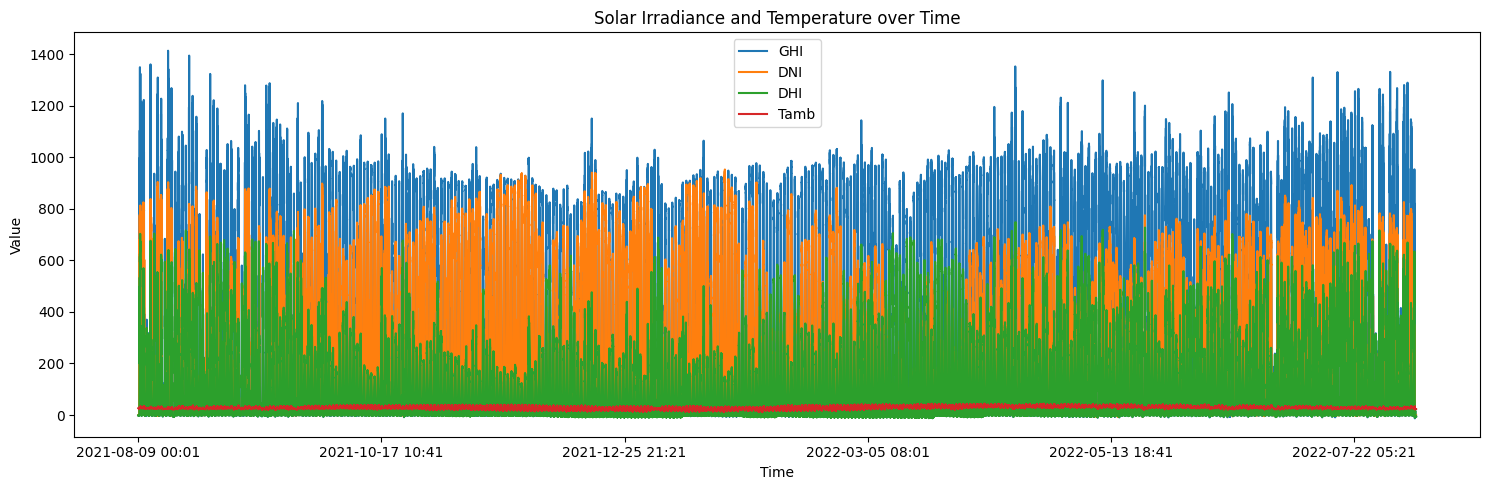

In [ ]:
# Plot GHI, DNI, DHI, and Tamb over time
df.set_index('Timestamp')[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(15, 5))
plt.title("Solar Irradiance and Temperature over Time")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()

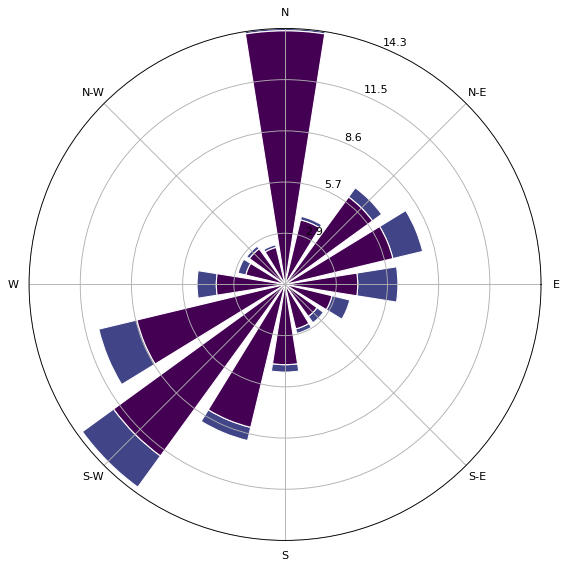

In [51]:
# pip install windrose or plotly-express
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df["WD"], df["WS"], normed=True, opening=0.8, edgecolor='white')


In [52]:
import os
print(os.getcwd())



c:\Users\hp\OneDrive\Desktop\solar-challenge-week1\notebooks


In [53]:
import pandas as pd

# Option A (raw string)
df = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\solar-challenge-week1\data\benin-malanville.csv")

# Option B (relative path, if the notebook is in notebooks/)
# df = pd.read_csv("../data/benin-malanville.csv")


MemoryError: Unable to allocate 64.2 MiB for an array with shape (16, 525600) and data type float64